<a href="https://colab.research.google.com/github/hssitja/PhD-Dissertation/blob/Chapter-1/Chapter3_empirical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdrobust
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=d34cee77219110ccd78e42f87ad7bf04147fa2e6b2fe2fa8b9949ffba1bc1cd2
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 KB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp39-cp39-linux_x86_64.whl size=317905 sha256=b1164c1b4c70854f086daf0dc34ffd296f86e5088831961c4be4654c9c53938e
  Stored in directory: /root/.cache/pip/wheels/09/e7/bc/33685b60ab54dba969596dd87244ee9f4c2e83dff9a53d4f20
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: 

In [ ]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy as sp
import sympy as smp

# from rdrobust import rdrobust, rdbwselect, rdplot

import statsmodels.api as sm
# from statsmodels.miscmodels.ordinal_model import OrderedModel

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# from mord import LogisticAT

In [ ]:
# Using R - %%R to make the whole cell run in R
%load_ext rpy2.ipython

from rpy2.robjects import r, pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
import rpy2.robjects.packages as rpackages
from rpy2.robjects import globalenv
# from rpy2.robjects.vectors import StrVector


pandas2ri.activate()

In [ ]:
%%R
install.packages('rdrobust')
install.packages('rddensity')
install.packages('huxtable')
install.packages('stargazer')
install.packages('modelsummary')
install.packages('gt')
install.packages('vtable')
install.packages('gridExtra')
install.packages('cowplot')
install.packages('dplyr')
install.packages('tikzDevice')

library(gt)
library(tidyverse)
library(broom)
library(rdrobust)
library(rddensity)
library(huxtable)
library(MASS)
library(stargazer)
library(modelsummary)
library(vtable)
library(gridExtra)
library(cowplot)
library(dplyr)
library(tikzDevice)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)






















































	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)


































	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpN2a623/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpN2a623/downloaded_packages’


✔ tibble  3.2.0     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = '/content/drive/MyDrive/3 Essay political economy COVID19/Dados/Eleitorais/'

df = pd.read_csv(os.path.join(folder,'df.csv'))

In [ ]:
df.columns.to_list()

['codigo_ibge',
 'codigo_tse',
 'Q1. Cordon Sanitaire (monitoring of entrance and exit of people in the municipality)',
 'Q1. Start date ',
 'Q2. Restrictive measures to avoid circulation/ agglomeration of people',
 'Q2. Start date ',
 'Q3. Measures of social isolation, allowing ONLY essential services',
 'Q3. Start date ',
 'Q4. Compulsory use of face covers',
 'Q4. Start date ',
 'Q5. Were any measures implemented to reduce the offer of public transportation?',
 'Q5. What was the percentage of reduction?',
 'Q5. Start date ',
 'Q6. Were measures of restriction and social isolation eased?',
 'Q6. Start date ',
 'nome_municipio',
 'capital',
 'FERNANDO HADDAD',
 'JAIR BOLSONARO',
 'Haddad_share',
 'Bolsonaro_share',
 'ELEITO_NM_URNA_CANDIDATO',
 'ELEITO_NM_CANDIDATO',
 'ELEITO_SQ_CANDIDATO',
 'ELEITO_ST_REELEICAO',
 'ELEITO_SG_PARTIDO',
 'ELEITO_Espectro',
 'ELEITO_QT_VOTOS_NOMINAIS',
 'ELEITO_PERCENTUAL',
 'N_ELEITO_NM_URNA_CANDIDATO',
 'N_ELEITO_NM_CANDIDATO',
 'N_ELEITO_SQ_CANDIDATO

In [ ]:
df['NPI_index'].value_counts(dropna=False)

3.0    2867
NaN    1599
2.0     945
1.0      84
0.0       3
Name: NPI_index, dtype: int64

In [ ]:
df['NPI_ibge'].value_counts(dropna=False)

5.0    1989
4.0    1474
3.0    1395
2.0     446
NaN     110
1.0      74
0.0      10
Name: NPI_ibge, dtype: int64

In [ ]:
espectro = pd.get_dummies(df[['ELEITO_Espectro','N_ELEITO_espectro','INCUMBENTE_Espectro','N_ELEITO_2016_Espectro']])

In [ ]:
df = pd.concat([df,espectro],axis=1)

In [ ]:
df['INCUMBENTE_Espectro'] = df['INCUMBENTE_Espectro'].replace('esquerda', 'Left-wing')
df['INCUMBENTE_Espectro'] = df['INCUMBENTE_Espectro'].replace('direita', 'Right-wing')
df['INCUMBENTE_Espectro'] = df['INCUMBENTE_Espectro'].replace('centro', 'Center')

In [ ]:
df[['pib','impostos_liquidos', 'va_agropecuaria', 'va_industria','va_servicos',\
    'va_adespss']] = df[['pib','impostos_liquidos', 'va_agropecuaria', 'va_industria',\
                         'va_servicos', 'va_adespss']].div(1000000).round(2)

In [ ]:
df.iloc[:, 61:80]

,ELEITO_DS_GRAU_INSTRUCAO,ELEITO_DS_COR_RACA,ELEITO_DS_OCUPACAO,N_ELEITO_NR_IDADE_DATA_POSSE,N_ELEITO_DS_GENERO,N_ELEITO_DS_GRAU_INSTRUCAO,N_ELEITO_DS_COR_RACA,N_ELEITO_DS_OCUPACAO,INCUMBENTE_NR_IDADE_DATA_POSSE,INCUMBENTE_DS_GENERO,INCUMBENTE_DS_GRAU_INSTRUCAO,INCUMBENTE_DS_COR_RACA,INCUMBENTE_DS_OCUPACAO,N_ELEITO_2016_NR_IDADE_DATA_POSSE,N_ELEITO_2016_DS_GENERO,N_ELEITO_2016_DS_GRAU_INSTRUCAO,N_ELEITO_2016_DS_COR_RACA,N_ELEITO_2016_DS_OCUPACAO,id_municipio
0,ENSINO MÉDIO COMPLETO,PARDA,EMPRESÁRIO,48.0,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,PARDA,SERVIDOR PÚBLICO MUNICIPAL,52.0,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,PREFEITO,50.0,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,EMPRESÁRIO,5200050
1,ENSINO MÉDIO COMPLETO,PARDA,PREFEITO,49.0,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,COMERCIANTE,60.0,MASCULINO,SUPERIOR INCOMPLETO,PARDA,SERVIDOR PÚBLICO MUNICIPAL,72.0,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,BRANCA,PREFEITO,3100104
2,SUPERIOR COMPLETO,PARDA,ADMINISTRADOR,47.0,MASCULINO,SUPERIOR COMPLETO,PRETA,POLICIAL MILITAR,52.0,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADMINISTRADOR,69.0,FEMININO,SUPERIOR COMPLETO,BRANCA,PEDAGOGO,5200100
3,SUPERIOR COMPLETO,BRANCA,PRODUTOR AGROPECUÁRIO,41.0,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADVOGADO,65.0,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADVOGADO,43.0,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADVOGADO,3100203
4,SUPERIOR COMPLETO,PARDA,PSICÓLOGO,52.0,MASCULINO,SUPERIOR COMPLETO,PARDA,PREFEITO,48.0,MASCULINO,SUPERIOR COMPLETO,PARDA,VEREADOR,51.0,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,VEREADOR,1500107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,SUPERIOR COMPLETO,PARDA,ADMINISTRADOR,55.0,MASCULINO,ENSINO MÉDIO INCOMPLETO,PARDA,EMPRESÁRIO,37.0,MASCULINO,SUPERIOR COMPLETO,PARDA,ADMINISTRADOR,51.0,MASCULINO,SUPERIOR INCOMPLETO,BRANCA,ADMINISTRADOR,2933604
5494,ENSINO MÉDIO COMPLETO,BRANCA,PREFEITO,30.0,MASCULINO,SUPERIOR COMPLETO,BRANCA,MÉDICO,30.0,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,VEREADOR,34.0,MASCULINO,SUPERIOR COMPLETO,PARDA,PEDAGOGO,2517407
5495,SUPERIOR COMPLETO,BRANCA,EMPRESÁRIO,50.0,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,BRANCA,EMPRESÁRIO,43.0,FEMININO,SUPERIOR COMPLETO,BRANCA,MÉDICO,48.0,MASCULINO,SUPERIOR COMPLETO,BRANCA,PREFEITO,3557154
5496,ENSINO MÉDIO COMPLETO,BRANCA,PREFEITO,65.0,MASCULINO,SUPERIOR COMPLETO,BRANCA,SERVIDOR PÚBLICO FEDERAL,47.0,FEMININO,ENSINO MÉDIO COMPLETO,PARDA,EMPRESÁRIO,61.0,MASCULINO,SUPERIOR COMPLETO,BRANCA,PROFESSOR DE ENSINO SUPERIOR,2114007


---

**Regression Discontinuity Design**

In [ ]:
RDD = df[['MARGIN_VICTORY','INCUMBENTE_ST_REELEICAO','N_ELEITO_2016_ST_REELEICAO',"NPI_index",
          'NPI_ibge', 'social_protection', 'Mcov01', 'Mcov04', 'Mcov053', 'no_beds_2020', 'deaths_2020', 'Bolsonaro_share',
          'INCUMBENTE_Espectro_direita','INCUMBENTE_Espectro_esquerda',"INCUMBENTE_Espectro_centro", 'sigla_uf',
          'INCUMBENTE_NR_IDADE_DATA_POSSE','INCUMBENTE_DS_GENERO', 'INCUMBENTE_DS_COR_RACA',
          'pib','impostos_liquidos', 'va_agropecuaria', 'va_industria','va_servicos', 'va_adespss', 'populacao',
          'INCUMBENTE_DS_OCUPACAO', 'INCUMBENTE_DS_GRAU_INSTRUCAO','INCUMBENTE_Espectro']].dropna(subset=['MARGIN_VICTORY'])

In [ ]:
RDD[['NPI_ibge', 'social_protection', 'no_beds_2020', 'deaths_2020']] =  RDD[['NPI_ibge', 'social_protection', 'no_beds_2020', 'deaths_2020']].astype('float64')

In [ ]:
# getting the 10 most frequent occupations

top10 = RDD['INCUMBENTE_DS_OCUPACAO'].value_counts()[:10].sort_values(ascending=False).index.to_list()
top10

['PREFEITO',
 'EMPRESÁRIO',
 'AGRICULTOR',
 'COMERCIANTE',
 'MÉDICO',
 'ADVOGADO',
 'OUTROS',
 'SERVIDOR PÚBLICO MUNICIPAL',
 'ADMINISTRADOR',
 'VEREADOR']

In [ ]:
# Creating dummies

ocupacao = pd.get_dummies(RDD['INCUMBENTE_DS_OCUPACAO'])
ocupacao = ocupacao.loc[:, top10]

RDD = pd.concat([RDD,ocupacao],axis=1)

In [ ]:
# Changing dummies 0, 1 to "S", "N"

uint8_cols = RDD.select_dtypes(include=['uint8']).columns

# Convert 
RDD[uint8_cols] = RDD[uint8_cols].replace({0: 'N', 1: 'S'})

In [ ]:
# Identify int64, int8, and object columns
int64_cols = RDD.select_dtypes(include=['int64']).columns
int8_cols = RDD.select_dtypes(include=['int8']).columns
obj_cols = RDD.select_dtypes(include=['object']).columns

# Convert int64 columns to int32
for col in int64_cols:
    RDD.loc[:,col] = RDD[col].astype(np.int32)

# Convert int8 columns to dummies
RDD = pd.get_dummies(RDD, columns=int8_cols, prefix=int8_cols)

# Convert object columns to category
for col in obj_cols:
    RDD.loc[:,col] = RDD[col].astype('category')

In [ ]:
RDD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 5497
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   MARGIN_VICTORY                  5163 non-null   float64 
 1   INCUMBENTE_ST_REELEICAO         5163 non-null   category
 2   N_ELEITO_2016_ST_REELEICAO      5163 non-null   category
 3   NPI_index                       3662 non-null   float64 
 4   NPI_ibge                        5059 non-null   float64 
 5   social_protection               5063 non-null   float64 
 6   Mcov01                          5064 non-null   float64 
 7   Mcov04                          5059 non-null   float64 
 8   Mcov053                         5063 non-null   float64 
 9   no_beds_2020                    4735 non-null   float64 
 10  deaths_2020                     4738 non-null   float64 
 11  Bolsonaro_share                 5163 non-null   float64 
 12  INCUMBENTE_Espectro_

In [ ]:
RDD.columns

Index(['MARGIN_VICTORY', 'INCUMBENTE_ST_REELEICAO',
       'N_ELEITO_2016_ST_REELEICAO', 'NPI_index', 'NPI_ibge',
       'social_protection', 'Mcov01', 'Mcov04', 'Mcov053', 'no_beds_2020',
       'deaths_2020', 'Bolsonaro_share', 'INCUMBENTE_Espectro_direita',
       'INCUMBENTE_Espectro_esquerda', 'INCUMBENTE_Espectro_centro',
       'sigla_uf', 'INCUMBENTE_NR_IDADE_DATA_POSSE', 'INCUMBENTE_DS_GENERO',
       'INCUMBENTE_DS_COR_RACA', 'pib', 'impostos_liquidos', 'va_agropecuaria',
       'va_industria', 'va_servicos', 'va_adespss', 'populacao',
       'INCUMBENTE_DS_OCUPACAO', 'INCUMBENTE_DS_GRAU_INSTRUCAO',
       'INCUMBENTE_Espectro', 'PREFEITO', 'EMPRESÁRIO', 'AGRICULTOR',
       'COMERCIANTE', 'MÉDICO', 'ADVOGADO', 'OUTROS',
       'SERVIDOR PÚBLICO MUNICIPAL', 'ADMINISTRADOR', 'VEREADOR'],
      dtype='object')

In [ ]:
RDD = RDD.drop(RDD[(RDD.INCUMBENTE_ST_REELEICAO == 'N') & (RDD.N_ELEITO_2016_ST_REELEICAO == 'N')].index)
RDD = RDD.drop(RDD[(RDD.INCUMBENTE_ST_REELEICAO == 'S') & (RDD.N_ELEITO_2016_ST_REELEICAO == 'S')].index)
RDD = RDD.drop(RDD[(RDD.INCUMBENTE_ST_REELEICAO == 'Não divulgável') | (RDD.N_ELEITO_2016_ST_REELEICAO == 'Não divulgável')].index)

In [ ]:
RDD['NPI_index'].value_counts(dropna=False)

3.0    1239
NaN     710
2.0     415
1.0      34
0.0       1
Name: NPI_index, dtype: int64

In [ ]:
RDD['NPI_ibge'].value_counts(dropna=False)

5.0    878
4.0    642
3.0    596
2.0    199
NaN     45
1.0     36
0.0      3
Name: NPI_ibge, dtype: int64

In [ ]:
# getting the 3 most frequent education level

RDD['INCUMBENTE_DS_GRAU_INSTRUCAO'].value_counts()[:3].sort_values(ascending=False)

SUPERIOR COMPLETO              1256
ENSINO MÉDIO COMPLETO           623
ENSINO FUNDAMENTAL COMPLETO     153
Name: INCUMBENTE_DS_GRAU_INSTRUCAO, dtype: int64

In [ ]:
RDD['INCUMBENTE_ST_REELEICAO'].value_counts()

S                 1223
N                 1176
Não divulgável       0
Name: INCUMBENTE_ST_REELEICAO, dtype: int64

In [ ]:
RDD['MARGIN_VICTORY'].max()

0.9529303434080814

In [ ]:
# converting df RDD to R language

r_df = ro.conversion.py2rpy(RDD)
globalenv['r_df'] = r_df

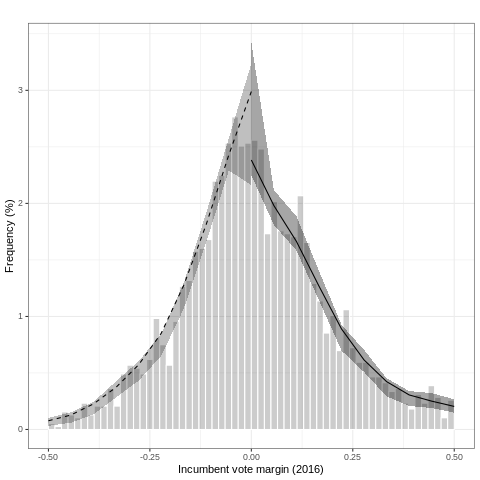

In [ ]:
# checking for continuity at cut off - OK!

%%R
result_rdd <- rdplotdensity(rdd = rddensity(X = r_df$MARGIN_VICTORY, c = 0, p = 2), X = r_df$MARGIN_VICTORY, 
                            lcol = 1, lty = c(2,1),  plotN = 10, histFillCol = 1, histFillShade = 0.2, CIshade = c(.25,0.35), plotRange = c(-.5,.5),
                            xlabel = "Incumbent vote margin (2016)", ylabel = "Frequency (%)")
ggsave(file="cutoff.png", width=5, height=3, dpi=300)

In [ ]:
%%R

# Plotting the discontinuity

ggplot(r_df, aes(x = MARGIN_VICTORY, y = NPI_index, color = INCUMBENTE_ST_REELEICAO)) +
  # Add a line based on a linear model for the incumbent not reelected
  geom_smooth(formula = y ~ x, data = filter(r_df, MARGIN_VICTORY < 0), method = "glm") +
  # Add a line based on a linear model for the reelected incumbent
  geom_smooth(formula = y ~ x, data = filter(r_df, MARGIN_VICTORY >= 0), method = "glm") +
  geom_vline(xintercept = 0, linetype = "dotted") + xlim(-.2, .2) + facet_wrap(~INCUMBENTE_Espectro) +
  labs(x = "Margin of votes in 2016", y = "NPIs adopted (survey)", color = "2nd Term")

ggsave(file="discontinuity.png", width=8, height=3, dpi=300)

In [ ]:
%%R

# Plotting the discontinuity

ggplot(r_df, aes(x = MARGIN_VICTORY, y = NPI_ibge, color = INCUMBENTE_ST_REELEICAO)) +
  # Add a line based on a linear model for the incumbent not reelected
  geom_smooth(formula = y ~ x, data = filter(r_df, MARGIN_VICTORY < 0), method = "glm") +
  # Add a line based on a linear model for the reelected incumbent
  geom_smooth(formula = y ~ x, data = filter(r_df, MARGIN_VICTORY >= 0), method = "glm") +
  geom_vline(xintercept = 0, linetype = "dotted") + xlim(-.2, .2) + facet_wrap(~INCUMBENTE_Espectro) +
  labs(x = "Margin of votes in 2016", y = "NPIs adopted (ibge)", color = "2nd Term")

ggsave(file="discontinuity2.png", width=8, height=3, dpi=300)

In [ ]:
%%R

# Plotting the discontinuity

ggplot(r_df, aes(x = MARGIN_VICTORY, y = social_protection, color = INCUMBENTE_ST_REELEICAO)) +
  # Add a line based on a linear model for the incumbent not reelected
  geom_smooth(formula = y ~ x, data = filter(r_df, MARGIN_VICTORY < 0), method = "glm") +
  # Add a line based on a linear model for the reelected incumbent
  geom_smooth(formula = y ~ x, data = filter(r_df, MARGIN_VICTORY >= 0), method = "glm") +
  geom_vline(xintercept = 0, linetype = "dotted") + xlim(-.2, .2) + facet_wrap(~INCUMBENTE_Espectro) +
  labs(x = "Margin of votes in 2016", y = "Social protection", color = "2nd Term")

ggsave(file="discontinuity3.png", width=8, height=3, dpi=300)

In [ ]:
%%R

# Treating 'sigla_uf' to represent state fixed effects

state = r_df$sigla_uf

state.f = factor(state)

state.d = model.matrix(~state.f+0)

In [ ]:
%%R

# Following code is needed to present rdrobust object with modelsummary package

#' Tidy a `rdrobust` regression discontinuity design object
#'
#' @param x A `rdrobust` object
#' @param ... extra arguments (not used)
#' @examples
#' \dontrun{
#' x <- runif(1000,-1,1)
#' y <- 3 * x + 2 * (x>=0) + rnorm(1000)
#' mod <- rdrobust(y,x)
#' 
#' tidy(mod)
#' 
#' glance(mod)
#' }
#' @export
tidy.rdrobust <- function(object, ...){
    ret <- tibble(term = row.names(object$coef), 
                  estimate = object$coef[, 1], 
                  std.error = object$se[, 1], 
                  statistic = object$z[, 1],
                  p.value = object$pv[, 1], 
                  conf.low = object$ci[,1],
                  conf.high = object$ci[, 2])
    ret
}

#' Glance a `rdrobust` regression discontinuity design object
#'
#' @inheritParams tidy.rdrobust
#' @export
glance.rdrobust <- function(object, ...){
    ret <- tibble(nobs.left = object$N[1],
                  nobs.right = object$N[2],
                  nobs.effective.left = object$N_h[1],
                  nobs.effective.right = object$N_h[2],
                  cutoff = object$c,
                  order.regression = object$q,
                  order.bias = object$q,
                  kernel = object$kernel,
                  bwselect = object$bwselect)
    ret
}

In [ ]:
%%R

# Creating variable to check for attrition effect - cities not reporting NPI adoption causing imbalances in the data

r_df <- r_df %>%
  mutate(attrit = is.na(NPI_index))

r_df$treatment <- ifelse(r_df$MARGIN_VICTORY > 0, 'treated', 'control')

In [ ]:
%%R

colnames(r_df)

 [1] "MARGIN_VICTORY"                 "INCUMBENTE_ST_REELEICAO"       
 [3] "N_ELEITO_2016_ST_REELEICAO"     "NPI_index"                     
 [5] "NPI_ibge"                       "social_protection"             
 [7] "Mcov01"                         "Mcov04"                        
 [9] "Mcov053"                        "no_beds_2020"                  
[11] "deaths_2020"                    "Bolsonaro_share"               
[13] "INCUMBENTE_Espectro_direita"    "INCUMBENTE_Espectro_esquerda"  
[15] "INCUMBENTE_Espectro_centro"     "sigla_uf"                      
[17] "INCUMBENTE_NR_IDADE_DATA_POSSE" "INCUMBENTE_DS_GENERO"          
[19] "INCUMBENTE_DS_COR_RACA"         "pib"                           
[21] "impostos_liquidos"              "va_agropecuaria"               
[23] "va_industria"                   "va_servicos"                   
[25] "va_adespss"                     "populacao"                     
[27] "INCUMBENTE_DS_OCUPACAO"         "INCUMBENTE_DS_GRAU_INSTRUCAO"  
[29] "

In [ ]:
%%R

# Balance table to check attrition among variables related to city and mayor characteristics

sumtable(r_df, vars=c('MARGIN_VICTORY', 'Bolsonaro_share', 'INCUMBENTE_Espectro',
                      'attrit', 'INCUMBENTE_NR_IDADE_DATA_POSSE', 'INCUMBENTE_DS_GENERO',
                      'INCUMBENTE_DS_COR_RACA', 'INCUMBENTE_DS_GRAU_INSTRUCAO','pib',
                      'impostos_liquidos','va_agropecuaria', 'va_industria', 'va_servicos',
                      'va_adespss', 'populacao'), group = 'attrit', group.test = TRUE, out = 'latex')

\begin{table}[!htbp] \centering \renewcommand*{\arraystretch}{1.1}\caption{Summary Statistics}\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrl}
\hline
\hline
attrit & \multicolumn{3}{c}{No} & \multicolumn{3}{c}{Yes} &   \\ 
 Variable & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{SD} & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{SD} & \multicolumn{1}{c}{Test} \\ 
\hline
MARGIN\_VICTORY & 1689 & 0.026 & 0.21 & 710 & 0.024 & 0.22 & F$=0.034^{}$ \\ 
Bolsonaro\_share & 1689 & 0.5 & 0.22 & 710 & 0.34 & 0.19 & F$=286.256^{***}$ \\ 
INCUMBENTE\_Espectro & 1689 &  &  & 710 &  &  & X2$=5.602^{*}$ \\ 
... Center & 618 & 37\% &  & 262 & 37\% &  &  \\ 
... Left-wing & 399 & 24\% &  & 196 & 28\% &  &  \\ 
... Right-wing & 672 & 40\% &  & 252 & 35\% &  &  \\ 
attrit & 1689 &  &  & 710 &  &  & X2$=2394.203^{***}$ \\ 
... No & 1689 & 100\% &  & 0 & 0\% &  &  \\ 
... Yes & 0 & 0\% &  & 710 & 100\% &  &  \\ 
INCUMBENTE\_NR\_IDADE\_DATA\_POSSE & 1689 

In [ ]:
%%R

# Balance table to check attrition regarding mayor previous employment

sumtable(r_df, vars=c("PREFEITO", "EMPRESÁRIO", "AGRICULTOR", "COMERCIANTE", 
                      "MÉDICO", "ADVOGADO", "ADMINISTRADOR","SERVIDOR PÚBLICO MUNICIPAL", 
                      "SERVIDOR PÚBLICO ESTADUAL") , group = 'attrit', group.test = TRUE, out = 'latex')


\begin{table}[!htbp] \centering \renewcommand*{\arraystretch}{1.1}\caption{Summary Statistics}\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrl}
\hline
\hline
attrit & \multicolumn{3}{c}{No} & \multicolumn{3}{c}{Yes} &   \\ 
 Variable & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{SD} & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{SD} & \multicolumn{1}{c}{Test} \\ 
\hline
PREFEITO & 1689 &  &  & 710 &  &  & X2$=0.895^{}$ \\ 
... N & 1116 & 66\% &  & 484 & 68\% &  &  \\ 
... S & 573 & 34\% &  & 226 & 32\% &  &  \\ 
EMPRESÁRIO & 1689 &  &  & 710 &  &  & X2$=0.444^{}$ \\ 
... N & 1486 & 88\% &  & 617 & 87\% &  &  \\ 
... S & 203 & 12\% &  & 93 & 13\% &  &  \\ 
AGRICULTOR & 1689 &  &  & 710 &  &  & X2$=7.59^{***}$ \\ 
... N & 1577 & 93\% &  & 684 & 96\% &  &  \\ 
... S & 112 & 7\% &  & 26 & 4\% &  &  \\ 
COMERCIANTE & 1689 &  &  & 710 &  &  & X2$=0.034^{}$ \\ 
... N & 1601 & 95\% &  & 675 & 95\% &  &  \\ 
... S & 88 & 5\% &  & 35 & 5\% & 

In [ ]:
%%R

# Balance table to check endogeinity in treatment among variables related to city and mayor characteristics

sumtable(r_df, vars=c('Bolsonaro_share', 'INCUMBENTE_Espectro',
                      'attrit', 'INCUMBENTE_NR_IDADE_DATA_POSSE', 'INCUMBENTE_DS_GENERO',
                      'INCUMBENTE_DS_COR_RACA', 'INCUMBENTE_DS_GRAU_INSTRUCAO','pib',
                      'impostos_liquidos','va_agropecuaria', 'va_industria', 'va_servicos',
                      'va_adespss', 'populacao'), group = 'treatment', group.test = TRUE, out = 'latex')

\begin{table}[!htbp] \centering \renewcommand*{\arraystretch}{1.1}\caption{Summary Statistics}\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrl}
\hline
\hline
treatment & \multicolumn{3}{c}{control} & \multicolumn{3}{c}{treated} &   \\ 
 Variable & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{SD} & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{SD} & \multicolumn{1}{c}{Test} \\ 
\hline
Bolsonaro\_share & 1176 & 0.44 & 0.22 & 1223 & 0.46 & 0.23 & F$=7.939^{***}$ \\ 
INCUMBENTE\_Espectro & 1176 &  &  & 1223 &  &  & X2$=10.847^{***}$ \\ 
... Center & 445 & 38\% &  & 435 & 36\% &  &  \\ 
... Left-wing & 257 & 22\% &  & 338 & 28\% &  &  \\ 
... Right-wing & 474 & 40\% &  & 450 & 37\% &  &  \\ 
attrit & 1176 &  &  & 1223 &  &  & X2$=1.912^{}$ \\ 
... No & 812 & 69\% &  & 877 & 72\% &  &  \\ 
... Yes & 364 & 31\% &  & 346 & 28\% &  &  \\ 
INCUMBENTE\_NR\_IDADE\_DATA\_POSSE & 1176 & 49 & 11 & 1223 & 49 & 9.8 & F$=0.278^{}$ \\ 
INCUMBENTE\_DS\_G

In [ ]:
%%R

# Balance table to check endogeinity in treatment regarding mayor previous employment

sumtable(r_df, vars=c("PREFEITO", "EMPRESÁRIO", "AGRICULTOR", "COMERCIANTE", 
                      "MÉDICO", "ADVOGADO", "ADMINISTRADOR","SERVIDOR PÚBLICO MUNICIPAL", 
                      "SERVIDOR PÚBLICO ESTADUAL") , group = 'treatment', group.test = TRUE, out = 'latex')


\begin{table}[!htbp] \centering \renewcommand*{\arraystretch}{1.1}\caption{Summary Statistics}\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrl}
\hline
\hline
treatment & \multicolumn{3}{c}{control} & \multicolumn{3}{c}{treated} &   \\ 
 Variable & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{SD} & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{SD} & \multicolumn{1}{c}{Test} \\ 
\hline
PREFEITO & 1176 &  &  & 1223 &  &  & X2$=1143.155^{***}$ \\ 
... N & 1175 & 100\% &  & 425 & 35\% &  &  \\ 
... S & 1 & 0\% &  & 798 & 65\% &  &  \\ 
EMPRESÁRIO & 1176 &  &  & 1223 &  &  & X2$=54.412^{***}$ \\ 
... N & 971 & 83\% &  & 1132 & 93\% &  &  \\ 
... S & 205 & 17\% &  & 91 & 7\% &  &  \\ 
AGRICULTOR & 1176 &  &  & 1223 &  &  & X2$=7.731^{***}$ \\ 
... N & 1092 & 93\% &  & 1169 & 96\% &  &  \\ 
... S & 84 & 7\% &  & 54 & 4\% &  &  \\ 
COMERCIANTE & 1176 &  &  & 1223 &  &  & X2$=47.466^{***}$ \\ 
... N & 1078 & 92\% &  & 1198 & 98\% &  &  \\ 
... 

In [ ]:
%%R

head(r_df)

   MARGIN_VICTORY INCUMBENTE_ST_REELEICAO N_ELEITO_2016_ST_REELEICAO NPI_index
0      0.13342159                       S                          N         2
1     -0.12716996                       N                          S         3
3      0.42848937                       S                          N         3
8     -0.44583582                       N                          S         3
9      0.06128007                       S                          N         2
10    -0.11360239                       N                          S         3
   NPI_ibge social_protection Mcov01 Mcov04 Mcov053 no_beds_2020 deaths_2020
0         5                10      2      2       1            0           1
1         4                 9      1      2       1            0           1
3         5                 1      2      2       1            0           1
8         1                 5      0      0       1          NaN         NaN
9         2                 7      1      0       1           

-----------------------------
**Model 1 - NPI index**

In [ ]:
%%R

# RDD - local linear, no covs

rd1 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d) 
summary(rd1)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                 1689
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  812          877
Eff. Number of Obs.             494          464
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.136        0.136
BW bias (b)                   0.253        0.253
rho (h/b)                     0.539        0.539
Unique Obs.                     812          876

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.126     0.060     2.084     0.037     [0.007 , 0.244]     
        Robust         -         -     2.043     0.041     [0.006 , 0.277]     


In [ ]:
%%R

# RDD - 2nd order polynomial, no covs

rd2 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, p = 2, covs = state.d)
summary(rd2)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                 1689
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  812          877
Eff. Number of Obs.             601          568
Order est. (p)                    2            2
Order bias  (q)                   3            3
BW est. (h)                   0.184        0.184
BW bias (b)                   0.285        0.285
rho (h/b)                     0.647        0.647
Unique Obs.                     812          876

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.149     0.076     1.956     0.050    [-0.000 , 0.298]     
        Robust         -         -     1.916     0.055    [-0.004 , 0.326]     


In [ ]:
%%R

rd4 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = r_df$INCUMBENTE_Espectro_direita == 'S') 
summary(rd4)


Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  672
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  346          326
Eff. Number of Obs.             187          150
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.112        0.112
BW bias (b)                   0.182        0.182
rho (h/b)                     0.612        0.612
Unique Obs.                     346          326

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.235     0.099     2.378     0.017     [0.041 , 0.429]     
        Robust         -         -     2.196     0.028     [0.028 , 0.490]     


In [ ]:
%%R

rd5 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = r_df$INCUMBENTE_Espectro_esquerda == 'S') 
summary(rd5)


Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  399
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  168          231
Eff. Number of Obs.              78           95
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.096        0.096
BW bias (b)                   0.175        0.175
rho (h/b)                     0.547        0.547
Unique Obs.                     168          231

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.127     0.126     1.008     0.313    [-0.120 , 0.375]     
        Robust         -         -     1.252     0.210    [-0.103 , 0.470]     


In [ ]:
%%R

rd6 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = r_df$INCUMBENTE_Espectro_centro == 'S') 
summary(rd6)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  618
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  298          320
Eff. Number of Obs.             165          147
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.131        0.131
BW bias (b)                   0.226        0.226
rho (h/b)                     0.580        0.580
Unique Obs.                     298          320

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.011     0.098     0.114     0.909    [-0.181 , 0.203]     
        Robust         -         -     0.224     0.823    [-0.201 , 0.253]     


In [ ]:
# %%R

# models <- list(
#   "1st order pol"     = rd1,
#   "2nd order pol"     = rd2,
#   )

# # options(modelsummary_factory_latex = 'gt') # not working
# modelsummary(models, output = "latex", statistic = c("std.error", "p.value"), stars = c('*' = .1, '**' = .05, '***' = .01))

In [ ]:
%%R

models <- list(
  "All ideologies"= rd1,
  "Rightwing"     = rd4,
  "Leftwing"      = rd5,
  'Centrist'      = rd6  
)

# options(modelsummary_factory_latex = 'gt') # not working
modelsummary(models, output = "latex", statistic = c("std.error", "p.value"), stars = c('*' = .1, '**' = .05, '***' = .01))

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & All ideologies & Rightwing & Leftwing & Centrist\\
\midrule
Conventional & \num{0.126}** & \num{0.235}** & \num{0.127} & \num{0.011}\\
 & (\num{0.060}) & (\num{0.099}) & (\num{0.126}) & \vphantom{1} (\num{0.098})\\
 & (\num{0.037}) & (\num{0.017}) & (\num{0.313}) & (\num{0.909})\\
Bias-Corrected & \num{0.142}** & \num{0.259}*** & \num{0.183} & \num{0.026}\\
 & (\num{0.060}) & (\num{0.099}) & (\num{0.126}) & (\num{0.098})\\
 & (\num{0.019}) & (\num{0.009}) & (\num{0.147}) & (\num{0.791})\\
Robust & \num{0.142}** & \num{0.259}** & \num{0.183} & \num{0.026}\\
 & (\num{0.069}) & (\num{0.118}) & (\num{0.146}) & (\num{0.116})\\
 & (\num{0.041}) & (\num{0.028}) & (\num{0.210}) & (\num{0.823})\\
\midrule
nobs.left & 812 & 346 & 168 & 298\\
nobs.right & 877 & 326 & 231 & 320\\
nobs.effective.left & 494 & 187 & 78 & 165\\
nobs.effective.right & 464 & 150 & 95 & 147\\
cutoff & 0 & 0 & 0 & 0\\
order.regression & 2 & 2 & 2 & 2\\
order.

----------------------------------
**Model 2 - NPI igbe**

In [ ]:
%%R

# RDD - local linear, no covs

rd1b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d) 
summary(rd1b)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                 2354
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 1154         1200
Eff. Number of Obs.             614          523
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.110        0.110
BW bias (b)                   0.195        0.195
rho (h/b)                     0.564        0.564
Unique Obs.                    1154         1199

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.034     0.124    -0.279     0.781    [-0.277 , 0.208]     
        Robust         -         -    -0.499     0.618    [-0.350 , 0.208]     


In [ ]:
%%R

rd4b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = r_df$INCUMBENTE_Espectro_direita == 'S') 
summary(rd4b)


Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  907
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  467          440
Eff. Number of Obs.             243          191
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.103        0.103
BW bias (b)                   0.184        0.184
rho (h/b)                     0.561        0.561
Unique Obs.                     467          440

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.087     0.203    -0.428     0.669    [-0.485 , 0.311]     
        Robust         -         -    -0.568     0.570    [-0.592 , 0.326]     


In [ ]:
%%R

rd5b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = r_df$INCUMBENTE_Espectro_esquerda == 'S') 
summary(rd5b)


Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  579
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  250          329
Eff. Number of Obs.             146          154
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.118        0.118
BW bias (b)                   0.199        0.199
rho (h/b)                     0.591        0.591
Unique Obs.                     250          329

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.072     0.260    -0.276     0.782    [-0.581 , 0.438]     
        Robust         -         -    -0.386     0.700    [-0.723 , 0.485]     


In [ ]:
%%R

rd6b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = r_df$INCUMBENTE_Espectro_centro == 'S') 
summary(rd6b)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  868
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  437          431
Eff. Number of Obs.             241          200
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.130        0.130
BW bias (b)                   0.214        0.214
rho (h/b)                     0.605        0.605
Unique Obs.                     437          431

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.077     0.174    -0.443     0.658    [-0.417 , 0.264]     
        Robust         -         -    -0.368     0.713    [-0.474 , 0.324]     


In [ ]:
%%R

models <- list(
  "All ideologies"= rd1b,
  "Rightwing"     = rd4b,
  "Leftwing"      = rd5b,
  'Centrist'      = rd6b  
)

# options(modelsummary_factory_latex = 'gt') # not working
modelsummary(models, output = "latex", statistic = c("std.error", "p.value"), stars = c('*' = .1, '**' = .05, '***' = .01))

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & All ideologies & Rightwing & Leftwing & Centrist\\
\midrule
Conventional & \num{-0.034} & \num{-0.087} & \num{-0.072} & \num{-0.077}\\
 & (\num{0.124}) & (\num{0.203}) & (\num{0.260}) & \vphantom{1} (\num{0.174})\\
 & (\num{0.781}) & (\num{0.669}) & (\num{0.782}) & (\num{0.658})\\
Bias-Corrected & \num{-0.071} & \num{-0.133} & \num{-0.119} & \num{-0.075}\\
 & (\num{0.124}) & (\num{0.203}) & (\num{0.260}) & (\num{0.174})\\
 & (\num{0.566}) & (\num{0.513}) & (\num{0.648}) & (\num{0.666})\\
Robust & \num{-0.071} & \num{-0.133} & \num{-0.119} & \num{-0.075}\\
 & (\num{0.142}) & (\num{0.234}) & (\num{0.308}) & (\num{0.204})\\
 & (\num{0.618}) & (\num{0.570}) & (\num{0.700}) & (\num{0.713})\\
\midrule
nobs.left & 1154 & 467 & 250 & 437\\
nobs.right & 1200 & 440 & 329 & 431\\
nobs.effective.left & 614 & 243 & 146 & 241\\
nobs.effective.right & 523 & 191 & 154 & 200\\
cutoff & 0 & 0 & 0 & 0\\
order.regression & 2 & 2 & 2 & 2\\
ord

--------------------
**Model 3 - social protection**

In [ ]:
%%R

# RDD - local linear, no covs

rd1c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d) 
summary(rd1c)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                 2355
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 1155         1200
Eff. Number of Obs.             555          463
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.096        0.096
BW bias (b)                   0.196        0.196
rho (h/b)                     0.487        0.487
Unique Obs.                    1155         1199

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -1.215     0.556    -2.186     0.029    [-2.304 , -0.125]    
        Robust         -         -    -2.347     0.019    [-2.667 , -0.239]    


In [ ]:
%%R

rd4c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = r_df$INCUMBENTE_Espectro_direita == 'S') 
summary(rd4c)


Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  907
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  467          440
Eff. Number of Obs.             187          141
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.074        0.074
BW bias (b)                   0.148        0.148
rho (h/b)                     0.501        0.501
Unique Obs.                     467          440

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -2.418     0.918    -2.633     0.008    [-4.217 , -0.618]    
        Robust         -         -    -2.735     0.006    [-4.777 , -0.788]    


In [ ]:
%%R

rd5c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = r_df$INCUMBENTE_Espectro_esquerda == 'S') 
summary(rd5c)


Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  579
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  250          329
Eff. Number of Obs.             153          169
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.127        0.127
BW bias (b)                   0.218        0.218
rho (h/b)                     0.585        0.585
Unique Obs.                     250          329

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.574     0.932    -0.616     0.538    [-2.400 , 1.252]     
        Robust         -         -    -0.737     0.461    [-2.933 , 1.330]     


In [ ]:
%%R

rd6c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = r_df$INCUMBENTE_Espectro_centro == 'S') 
summary(rd6c)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  869
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  438          431
Eff. Number of Obs.             263          227
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.144        0.144
BW bias (b)                   0.268        0.268
rho (h/b)                     0.538        0.538
Unique Obs.                     438          431

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.572     0.774    -0.740     0.459    [-2.089 , 0.944]     
        Robust         -         -    -0.779     0.436    [-2.455 , 1.059]     


In [ ]:
%%R

models <- list(
  "Rightwing"     = rd4b,
  "Leftwing"      = rd5b,
  'Centrist'      = rd6b,
  "Rightwing"     = rd4c,
  "Leftwing"      = rd5c,
  'Centrist'      = rd6c  
)

# options(modelsummary_factory_latex = 'gt') # not working
modelsummary(models, output = "latex", statistic = c("std.error", "p.value"), stars = c('*' = .1, '**' = .05, '***' = .01))

\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & Rightwing & Leftwing & Centrist & Rightwing  & Leftwing  & Centrist \\
\midrule
Conventional & \num{-0.087} & \num{-0.072} & \num{-0.077} & \num{-2.418}*** & \num{-0.574} & \num{-0.572}\\
 & (\num{0.203}) & (\num{0.260}) & (\num{0.174}) & (\num{0.918}) & (\num{0.932}) & \vphantom{1} (\num{0.774})\\
 & (\num{0.669}) & (\num{0.782}) & (\num{0.658}) & (\num{0.008}) & (\num{0.538}) & (\num{0.459})\\
Bias-Corrected & \num{-0.133} & \num{-0.119} & \num{-0.075} & \num{-2.783}*** & \num{-0.801} & \num{-0.698}\\
 & (\num{0.203}) & (\num{0.260}) & (\num{0.174}) & (\num{0.918}) & (\num{0.932}) & (\num{0.774})\\
 & (\num{0.513}) & (\num{0.648}) & (\num{0.666}) & (\num{0.002}) & (\num{0.390}) & (\num{0.367})\\
Robust & \num{-0.133} & \num{-0.119} & \num{-0.075} & \num{-2.783}*** & \num{-0.801} & \num{-0.698}\\
 & (\num{0.234}) & (\num{0.308}) & (\num{0.204}) & (\num{1.017}) & (\num{1.087}) & (\num{0.896})\\
 & (\num{0.570}) & (\num{0

-----------------
**Dividing cities where mu < or > 0.5**

In [ ]:
%%R

rd7 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$Bolsonaro_share > .5))
summary(rd7)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  935
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  419          516
Eff. Number of Obs.             299          313
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.180        0.180
BW bias (b)                   0.345        0.345
rho (h/b)                     0.521        0.521
Unique Obs.                     419          515

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.189     0.079     2.396     0.017     [0.034 , 0.344]     
        Robust         -         -     2.271     0.023     [0.028 , 0.380]     


In [ ]:
%%R

rd7b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$Bolsonaro_share > .5))
summary(rd7b)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                 1092
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  495          597
Eff. Number of Obs.             346          352
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.176        0.176
BW bias (b)                   0.303        0.303
rho (h/b)                     0.581        0.581
Unique Obs.                     495          596

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.024     0.153    -0.156     0.876    [-0.324 , 0.276]     
        Robust         -         -    -0.651     0.515    [-0.568 , 0.285]     


In [ ]:
%%R

rd7c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$Bolsonaro_share > .5))
summary(rd7c)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                 1092
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  495          597
Eff. Number of Obs.             245          226
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.104        0.104
BW bias (b)                   0.202        0.202
rho (h/b)                     0.516        0.516
Unique Obs.                     495          596

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -1.431     0.796    -1.796     0.072    [-2.992 , 0.130]     
        Robust         -         -    -1.967     0.049    [-3.542 , -0.006]    


In [ ]:
%%R

rd8 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S' & r_df$Bolsonaro_share >= .5))
summary(rd8)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  329
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  163          166
Eff. Number of Obs.              82           66
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.095        0.095
BW bias (b)                   0.172        0.172
rho (h/b)                     0.552        0.552
Unique Obs.                     163          166

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.433     0.179     2.422     0.015     [0.083 , 0.784]     
        Robust         -         -     2.406     0.016     [0.092 , 0.903]     


In [ ]:
%%R

rd8b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S' & r_df$Bolsonaro_share >= .5))
summary(rd8b)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  369
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  187          182
Eff. Number of Obs.             129          103
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.158        0.158
BW bias (b)                   0.257        0.257
rho (h/b)                     0.614        0.614
Unique Obs.                     187          182

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.030     0.264     0.112     0.910    [-0.488 , 0.547]     
        Robust         -         -     0.232     0.817    [-0.546 , 0.692]     


In [ ]:
%%R

rd8c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S' & r_df$Bolsonaro_share >= .5))
summary(rd8c)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  369
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  187          182
Eff. Number of Obs.              83           66
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.089        0.089
BW bias (b)                   0.166        0.166
rho (h/b)                     0.535        0.535
Unique Obs.                     187          182

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -3.080     1.430    -2.154     0.031    [-5.883 , -0.277]    
        Robust         -         -    -2.181     0.029    [-6.863 , -0.366]    


In [ ]:
%%R

rd9 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S' & r_df$Bolsonaro_share < .5))
summary(rd9)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  343
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  183          160
Eff. Number of Obs.              59           40
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.054        0.054
BW bias (b)                   0.091        0.091
rho (h/b)                     0.600        0.600
Unique Obs.                     183          160

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.035     0.129     0.271     0.787    [-0.217 , 0.287]     
        Robust         -         -    -0.035     0.972    [-0.294 , 0.284]     


In [ ]:
%%R

rd9b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d, 
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S' & r_df$Bolsonaro_share < .5))
summary(rd9b)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  538
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  280          258
Eff. Number of Obs.             123           93
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.083        0.083
BW bias (b)                   0.145        0.145
rho (h/b)                     0.574        0.574
Unique Obs.                     280          258

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.332     0.240    -1.386     0.166    [-0.802 , 0.137]     
        Robust         -         -    -1.459     0.145    [-0.937 , 0.137]     


In [ ]:
%%R

rd9c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S' & r_df$Bolsonaro_share < .5))
summary(rd9c)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  538
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  280          258
Eff. Number of Obs.             118           84
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.077        0.077
BW bias (b)                   0.143        0.143
rho (h/b)                     0.537        0.537
Unique Obs.                     280          258

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -2.154     1.010    -2.132     0.033    [-4.134 , -0.174]    
        Robust         -         -    -2.227     0.026    [-4.735 , -0.302]    


In [ ]:
%%R

models <- list(
  "y = NPI index" = rd8,
  "y = NPI IBGE" = rd8b,
  "y = social protection" = rd8c,
  "y = NPI index" = rd9,
  "y = NPI IBGE" = rd9b,
  "y = social protection" = rd9c  
)

# options(modelsummary_factory_latex = 'gt') # not working
modelsummary(models, output = "latex", statistic = c("std.error", "p.value"), stars = c('*' = .1, '**' = .05, '***' = .01))

\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & y = NPI index & y = NPI IBGE & y = social protection & y = NPI index  & y = NPI IBGE  & y = social protection \\
\midrule
Conventional & \num{0.433}** & \num{0.030} & \num{-3.080}** & \num{0.035} & \num{-0.332} & \num{-2.154}**\\
 & (\num{0.179}) & (\num{0.264}) & (\num{1.430}) & (\num{0.129}) & (\num{0.240}) & \vphantom{1} (\num{1.010})\\
 & (\num{0.015}) & (\num{0.910}) & (\num{0.031}) & (\num{0.787}) & (\num{0.166}) & (\num{0.033})\\
Bias-Corrected & \num{0.498}*** & \num{0.073} & \num{-3.615}** & \num{-0.005} & \num{-0.400}* & \num{-2.519}**\\
 & (\num{0.179}) & (\num{0.264}) & (\num{1.430}) & (\num{0.129}) & (\num{0.240}) & (\num{1.010})\\
 & (\num{0.005}) & (\num{0.781}) & (\num{0.011}) & (\num{0.968}) & (\num{0.095}) & (\num{0.013})\\
Robust & \num{0.498}** & \num{0.073} & \num{-3.615}** & \num{-0.005} & \num{-0.400} & \num{-2.519}**\\
 & (\num{0.207}) & (\num{0.316}) & (\num{1.658}) & (\num{0.147}) & (\num{0.274}

In [ ]:
%%R

rd10 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_esquerda == 'S' & r_df$Bolsonaro_share >= .5))
summary(rd10)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  188
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                   72          116
Eff. Number of Obs.              24           32
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.076        0.076
BW bias (b)                   0.113        0.113
rho (h/b)                     0.672        0.672
Unique Obs.                      72          116

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.356     0.189     1.882     0.060    [-0.015 , 0.726]     
        Robust         -         -     1.611     0.107    [-0.083 , 0.846]     


In [ ]:
%%R

rd10b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_esquerda == 'S' & r_df$Bolsonaro_share >= .5))
summary(rd10b)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  217
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                   82          135
Eff. Number of Obs.              43           50
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.113        0.113
BW bias (b)                   0.163        0.163
rho (h/b)                     0.690        0.690
Unique Obs.                      82          135

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.163     0.426     0.382     0.702    [-0.672 , 0.998]     
        Robust         -         -     0.187     0.852    [-0.933 , 1.129]     


In [ ]:
%%R

rd10c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_esquerda == 'S' & r_df$Bolsonaro_share >= .5))
summary(rd10c)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  217
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                   82          135
Eff. Number of Obs.              47           56
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.126        0.126
BW bias (b)                   0.206        0.206
rho (h/b)                     0.610        0.610
Unique Obs.                      82          135

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.416     1.422    -0.293     0.770    [-3.204 , 2.371]     
        Robust         -         -    -0.618     0.537    [-4.111 , 2.141]     


In [ ]:
%%R

rd11 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_esquerda == 'S' & r_df$Bolsonaro_share < .5))
summary(rd11)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  211
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                   96          115
Eff. Number of Obs.              51           64
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.116        0.116
BW bias (b)                   0.190        0.190
rho (h/b)                     0.607        0.607
Unique Obs.                      96          115

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.181     0.176    -1.028     0.304    [-0.525 , 0.164]     
        Robust         -         -    -0.867     0.386    [-0.588 , 0.227]     


In [ ]:
%%R

rd11b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_esquerda == 'S' & r_df$Bolsonaro_share < .5))
summary(rd11b)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  362
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  168          194
Eff. Number of Obs.              84           86
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.093        0.093
BW bias (b)                   0.157        0.157
rho (h/b)                     0.593        0.593
Unique Obs.                     168          194

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.301     0.358    -0.841     0.401    [-1.003 , 0.401]     
        Robust         -         -    -0.818     0.413    [-1.189 , 0.489]     


In [ ]:
%%R

rd11c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_esquerda == 'S' & r_df$Bolsonaro_share < .5))
summary(rd11c)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  362
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  168          194
Eff. Number of Obs.              96           98
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.109        0.109
BW bias (b)                   0.187        0.187
rho (h/b)                     0.583        0.583
Unique Obs.                     168          194

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.660     1.244    -0.531     0.596    [-3.099 , 1.779]     
        Robust         -         -    -0.367     0.713    [-3.498 , 2.394]     


In [ ]:
%%R

models <- list(
  "y = NPI index" = rd10,
  "y = NPI IBGE" = rd10b,
  "y = social protection" = rd10c,
  "y = NPI index" = rd11,
  "y = NPI IBGE" = rd11b,
  "y = social protection" = rd11c  
)

# options(modelsummary_factory_latex = 'gt') # not working
modelsummary(models, output = "latex", statistic = c("std.error", "p.value"), stars = c('*' = .1, '**' = .05, '***' = .01))

\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & y = NPI index & y = NPI IBGE & y = social protection & y = NPI index  & y = NPI IBGE  & y = social protection \\
\midrule
Conventional & \num{0.356}* & \num{0.163} & \num{-0.416} & \num{-0.181} & \num{-0.301} & \num{-0.660}\\
 & (\num{0.189}) & (\num{0.426}) & (\num{1.422}) & (\num{0.176}) & (\num{0.358}) & \vphantom{1} (\num{1.244})\\
 & (\num{0.060}) & (\num{0.702}) & (\num{0.770}) & (\num{0.304}) & (\num{0.401}) & (\num{0.596})\\
Bias-Corrected & \num{0.381}** & \num{0.098} & \num{-0.985} & \num{-0.180} & \num{-0.350} & \num{-0.552}\\
 & (\num{0.189}) & (\num{0.426}) & (\num{1.422}) & (\num{0.176}) & (\num{0.358}) & (\num{1.244})\\
 & (\num{0.044}) & (\num{0.818}) & (\num{0.489}) & (\num{0.305}) & (\num{0.328}) & (\num{0.657})\\
Robust & \num{0.381} & \num{0.098} & \num{-0.985} & \num{-0.180} & \num{-0.350} & \num{-0.552}\\
 & (\num{0.237}) & (\num{0.526}) & (\num{1.595}) & (\num{0.208}) & (\num{0.428}) & (\num{1.503}

In [ ]:
%%R

rd12 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_centro == 'S' & r_df$Bolsonaro_share >= .5))
summary(rd12)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  418
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  184          234
Eff. Number of Obs.             108          114
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.139        0.139
BW bias (b)                   0.240        0.240
rho (h/b)                     0.579        0.579
Unique Obs.                     184          234

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.144     0.113     1.281     0.200    [-0.076 , 0.365]     
        Robust         -         -     1.304     0.192    [-0.085 , 0.424]     


In [ ]:
%%R

rd12b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_centro == 'S' & r_df$Bolsonaro_share >= .5))
summary(rd12b)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  506
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  226          280
Eff. Number of Obs.             133          139
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.144        0.144
BW bias (b)                   0.237        0.237
rho (h/b)                     0.607        0.607
Unique Obs.                     226          280

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.206     0.220    -0.933     0.351    [-0.637 , 0.226]     
        Robust         -         -    -0.651     0.515    [-0.667 , 0.334]     


In [ ]:
%%R

rd12c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_centro == 'S' & r_df$Bolsonaro_share >= .5))
summary(rd12c)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  506
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  226          280
Eff. Number of Obs.             123          119
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.125        0.125
BW bias (b)                   0.208        0.208
rho (h/b)                     0.598        0.598
Unique Obs.                     226          280

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -1.250     1.160    -1.078     0.281    [-3.523 , 1.023]     
        Robust         -         -    -1.128     0.259    [-4.200 , 1.132]     


In [ ]:
%%R

rd13 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_centro == 'S' & r_df$Bolsonaro_share < .5))
summary(rd13)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  200
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  114           86
Eff. Number of Obs.              42           33
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.091        0.091
BW bias (b)                   0.158        0.158
rho (h/b)                     0.578        0.578
Unique Obs.                     114           86

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.281     0.218    -1.291     0.197    [-0.707 , 0.145]     
        Robust         -         -    -1.191     0.234    [-0.828 , 0.202]     


In [ ]:
%%R

rd13b <- rdrobust(y = r_df$NPI_ibge, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_centro == 'S' & r_df$Bolsonaro_share < .5))
summary(rd13b)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  362
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  211          151
Eff. Number of Obs.              83           55
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.086        0.086
BW bias (b)                   0.183        0.183
rho (h/b)                     0.472        0.472
Unique Obs.                     211          151

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.075     0.271     0.277     0.782    [-0.455 , 0.605]     
        Robust         -         -     0.193     0.847    [-0.537 , 0.655]     


In [ ]:
%%R

rd13c <- rdrobust(y = r_df$social_protection, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_centro == 'S' & r_df$Bolsonaro_share < .5))
summary(rd13c)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  363
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  212          151
Eff. Number of Obs.             100           63
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.104        0.104
BW bias (b)                   0.162        0.162
rho (h/b)                     0.645        0.645
Unique Obs.                     212          151

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.420     1.424    -0.295     0.768    [-3.210 , 2.370]     
        Robust         -         -    -0.286     0.775    [-3.891 , 2.900]     


In [ ]:
%%R

models <- list(
  "y = NPI index" = rd12,
  "y = NPI IBGE" = rd12b,
  "y = social protection" = rd12c,
  "y = NPI index" = rd13,
  "y = NPI IBGE" = rd13b,
  "y = social protection" = rd13c  
)

# options(modelsummary_factory_latex = 'gt') # not working
modelsummary(models, output = "latex", statistic = c("std.error", "p.value"), stars = c('*' = .1, '**' = .05, '***' = .01))

\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & y = NPI index & y = NPI IBGE & y = social protection & y = NPI index  & y = NPI IBGE  & y = social protection \\
\midrule
Conventional & \num{0.144} & \num{-0.206} & \num{-1.250} & \num{-0.281} & \num{0.075} & \num{-0.420}\\
 & (\num{0.113}) & (\num{0.220}) & (\num{1.160}) & (\num{0.218}) & (\num{0.271}) & \vphantom{1} (\num{1.424})\\
 & (\num{0.200}) & (\num{0.351}) & (\num{0.281}) & (\num{0.197}) & (\num{0.782}) & (\num{0.768})\\
Bias-Corrected & \num{0.169} & \num{-0.166} & \num{-1.534} & \num{-0.313} & \num{0.059} & \num{-0.495}\\
 & (\num{0.113}) & (\num{0.220}) & (\num{1.160}) & (\num{0.218}) & (\num{0.271}) & (\num{1.424})\\
 & (\num{0.133}) & (\num{0.451}) & (\num{0.186}) & (\num{0.150}) & (\num{0.829}) & (\num{0.728})\\
Robust & \num{0.169} & \num{-0.166} & \num{-1.534} & \num{-0.313} & \num{0.059} & \num{-0.495}\\
 & (\num{0.130}) & (\num{0.255}) & (\num{1.360}) & (\num{0.263}) & (\num{0.304}) & (\num{1.732})\\

------------------------
**Placebo tests**

In [ ]:
%%R

placebo1 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = -0.15, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S'))
summary(placebo1)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  672
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  109          563
Eff. Number of Obs.              34           86
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.067        0.067
BW bias (b)                   0.114        0.114
rho (h/b)                     0.587        0.587
Unique Obs.                     109          563

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.244     0.212    -1.149     0.250    [-0.660 , 0.172]     
        Robust         -         -    -1.388     0.165    [-0.831 , 0.142]     


In [ ]:
%%R

placebo2 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0.15, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S'))
summary(placebo2)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  672
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  538          134
Eff. Number of Obs.             127           66
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.114        0.114
BW bias (b)                   0.178        0.178
rho (h/b)                     0.640        0.640
Unique Obs.                     538          134

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.078     0.148    -0.528     0.597    [-0.367 , 0.211]     
        Robust         -         -    -0.227     0.820    [-0.386 , 0.306]     


In [ ]:
%%R

placebo3 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0.1, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S' & r_df$Bolsonaro_share < .5))
summary(placebo3)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  343
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  253           90
Eff. Number of Obs.             113           60
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.144        0.144
BW bias (b)                   0.339        0.339
rho (h/b)                     0.426        0.426
Unique Obs.                     253           90

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.095     0.089    -1.075     0.282    [-0.269 , 0.078]     
        Robust         -         -    -0.840     0.401    [-0.277 , 0.111]     


In [ ]:
%%R

placebo4 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = -0.1, covs = state.d,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S' & r_df$Bolsonaro_share < .5))
summary(placebo4)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  343
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                   90          253
Eff. Number of Obs.              48           97
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.105        0.105
BW bias (b)                   0.175        0.175
rho (h/b)                     0.603        0.603
Unique Obs.                      90          253

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional    -0.260     0.145    -1.794     0.073    [-0.543 , 0.024]     
        Robust         -         -    -1.758     0.079    [-0.653 , 0.035]     


In [ ]:
%%R

models <- list(
  "c = -0.15" = placebo1,
  "c = 0.15" = placebo2,
  "c = -0.1" = placebo4,
  "c = 0.1" = placebo3  
)

# options(modelsummary_factory_latex = 'gt') # not working
modelsummary(models, output = "latex", statistic = c("std.error", "p.value"), stars = c('*' = .1, '**' = .05, '***' = .01))

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & c = -0.15 & c = 0.15 & c = -0.1 & c = 0.1\\
\midrule
Conventional & \num{-0.244} & \num{-0.078} & \num{-0.260}* & \num{-0.095}\\
 & (\num{0.212}) & (\num{0.148}) & (\num{0.145}) & \vphantom{1} (\num{0.089})\\
 & (\num{0.250}) & (\num{0.597}) & (\num{0.073}) & (\num{0.282})\\
Bias-Corrected & \num{-0.345} & \num{-0.040} & \num{-0.309}** & \num{-0.083}\\
 & (\num{0.212}) & (\num{0.148}) & (\num{0.145}) & (\num{0.089})\\
 & (\num{0.105}) & (\num{0.786}) & (\num{0.033}) & (\num{0.348})\\
Robust & \num{-0.345} & \num{-0.040} & \num{-0.309}* & \num{-0.083}\\
 & (\num{0.248}) & (\num{0.177}) & (\num{0.176}) & (\num{0.099})\\
 & (\num{0.165}) & (\num{0.820}) & (\num{0.079}) & (\num{0.401})\\
\midrule
nobs.left & 109 & 538 & 90 & 253\\
nobs.right & 563 & 134 & 253 & 90\\
nobs.effective.left & 34 & 127 & 48 & 113\\
nobs.effective.right & 86 & 66 & 97 & 60\\
cutoff & -0.15 & 0.15 & -0.1 & 0.1\\
order.regression & 2 & 2 & 2 & 2\\
orde

In [ ]:
%%R

robustness1 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d, kernel = "uniform",
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S'))
summary(robustness1)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  672
BW type                       mserd
Kernel                      Uniform
VCE method                       NN

Number of Obs.                  346          326
Eff. Number of Obs.             150          108
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.079        0.079
BW bias (b)                   0.158        0.158
rho (h/b)                     0.499        0.499
Unique Obs.                     346          326

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.291     0.105     2.778     0.005     [0.086 , 0.497]     
        Robust         -         -     2.494     0.013     [0.065 , 0.539]     


In [ ]:
%%R

robustness2 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d, kernel = "epanechnikov",
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S'))
summary(robustness2)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  672
BW type                       mserd
Kernel                   Epanechnikov
VCE method                       NN

Number of Obs.                  346          326
Eff. Number of Obs.             177          140
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.104        0.104
BW bias (b)                   0.179        0.179
rho (h/b)                     0.581        0.581
Unique Obs.                     346          326

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.241     0.099     2.428     0.015     [0.046 , 0.436]     
        Robust         -         -     2.252     0.024     [0.035 , 0.498]     


In [ ]:
%%R

robustness3 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d, bwselect = "cerrd",
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S'))
summary(robustness3)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  672
BW type                       cerrd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  346          326
Eff. Number of Obs.             150          111
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.081        0.081
BW bias (b)                   0.182        0.182
rho (h/b)                     0.442        0.442
Unique Obs.                     346          326

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.268     0.114     2.342     0.019     [0.044 , 0.491]     
        Robust         -         -     2.251     0.024     [0.037 , 0.528]     


In [ ]:
%%R

robustness4 <- rdrobust(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, covs = state.d,  h = 0.2*2,
                subset = (r_df$INCUMBENTE_Espectro_direita == 'S'))
summary(robustness4)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                  672
BW type                      Manual
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  346          326
Eff. Number of Obs.             332          286
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.400        0.400
BW bias (b)                   0.400        0.400
rho (h/b)                     1.000        1.000
Unique Obs.                     346          326

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.128     0.061     2.091     0.037     [0.008 , 0.248]     
        Robust         -         -     2.354     0.019     [0.034 , 0.376]     


In [ ]:
%%R

models <- list(
  "kernel = uniform" = robustness1,
  "kernel = epanechnikov" = robustness2,
  "bw = cerrd" = robustness3,
  "bw = 0.2" = robustness4  
)

# options(modelsummary_factory_latex = 'gt') # not working
modelsummary(models, output = "latex", statistic = c("std.error", "p.value"), stars = c('*' = .1, '**' = .05, '***' = .01))

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & kernel = uniform & kernel = epanechnikov & bw = cerrd & bw = 0.2\\
\midrule
Conventional & \num{0.291}*** & \num{0.241}** & \num{0.268}** & \num{0.128}**\\
 & (\num{0.105}) & (\num{0.099}) & (\num{0.114}) & \vphantom{1} (\num{0.061})\\
 & (\num{0.005}) & (\num{0.015}) & (\num{0.019}) & (\num{0.037})\\
Bias-Corrected & \num{0.302}*** & \num{0.267}*** & \num{0.282}** & \num{0.205}***\\
 & (\num{0.105}) & (\num{0.099}) & (\num{0.114}) & (\num{0.061})\\
 & (\num{0.004}) & (\num{0.007}) & (\num{0.013}) & (\num{<0.001})\\
Robust & \num{0.302}** & \num{0.267}** & \num{0.282}** & \num{0.205}**\\
 & (\num{0.121}) & (\num{0.118}) & (\num{0.125}) & (\num{0.087})\\
 & (\num{0.013}) & (\num{0.024}) & (\num{0.024}) & (\num{0.019})\\
\midrule
nobs.left & 346 & 346 & 346 & 346\\
nobs.right & 326 & 326 & 326 & 326\\
nobs.effective.left & 150 & 177 & 150 & 332\\
nobs.effective.right & 108 & 140 & 111 & 286\\
cutoff & 0 & 0 & 0 & 0\\
order.r

In [ ]:
%%R

rdbwselect(y = r_df$NPI_index, x = r_df$MARGIN_VICTORY, c = 0, all = TRUE) %>% 
  summary()

Call: rdbwselect

Number of Obs.                 1689
BW type                         All
Kernel                   Triangular
VCE method                       NN

Number of Obs.                  812          877
Order est. (p)                    1            1
Order bias  (q)                   2            2
Unique Obs.                     812          876

                  BW est. (h)    BW bias (b)
            Left of c Right of c  Left of c Right of c
     mserd     0.176      0.176      0.329      0.329
    msetwo     0.183      0.189      0.311      0.394
    msesum     0.188      0.188      0.348      0.348
  msecomb1     0.176      0.176      0.329      0.329
  msecomb2     0.183      0.188      0.329      0.348
     cerrd     0.122      0.122      0.329      0.329
    certwo     0.126      0.130      0.311      0.394
    cersum     0.130      0.130      0.348      0.348
  cercomb1     0.122      0.122      0.329      0.329
  cercomb2     0.126      0.130      0.329      0.348


--------------------------------------
**Descriptive Statistics**

In [ ]:
RDD.columns.to_list()

['MARGIN_VICTORY',
 'INCUMBENTE_ST_REELEICAO',
 'N_ELEITO_2016_ST_REELEICAO',
 'NPI_index',
 'NPI_ibge',
 'social_protection',
 'Mcov01',
 'Mcov04',
 'Mcov053',
 'no_beds_2020',
 'deaths_2020',
 'Bolsonaro_share',
 'INCUMBENTE_Espectro_direita',
 'INCUMBENTE_Espectro_esquerda',
 'INCUMBENTE_Espectro_centro',
 'sigla_uf',
 'INCUMBENTE_NR_IDADE_DATA_POSSE',
 'INCUMBENTE_DS_GENERO',
 'INCUMBENTE_DS_COR_RACA',
 'pib',
 'impostos_liquidos',
 'va_agropecuaria',
 'va_industria',
 'va_servicos',
 'va_adespss',
 'populacao',
 'INCUMBENTE_DS_OCUPACAO',
 'INCUMBENTE_DS_GRAU_INSTRUCAO',
 'INCUMBENTE_Espectro',
 'PREFEITO',
 'EMPRESÁRIO',
 'AGRICULTOR',
 'COMERCIANTE',
 'MÉDICO',
 'ADVOGADO',
 'OUTROS',
 'SERVIDOR PÚBLICO MUNICIPAL',
 'ADMINISTRADOR',
 'VEREADOR']

In [ ]:
RDD = df.rename(columns={'Q2. Restrictive measures to avoid circulation/ agglomeration of people':'Social distancing',
                        'Q3. Measures of social isolation, allowing ONLY essential services':'Business closures',
                        'Q4. Compulsory use of face covers':'Mask mandates','NPI_index':'NPI index','NPI_ibge':'NPI IBGE', 'Mcov053':'Mask mandates (IBGE)', 'Mcov01': 'Social distancing (IBGE)',
                       'Mcov04': 'Sanctions (IBGE)'})

In [ ]:
print(RDD[['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',
       'Sanctions (IBGE)', 'NPI IBGE']].describe().T.iloc[:, list(range(4)) + [-1]].round(3).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   count &   mean &    std &  min &  max \\
\midrule
Social distancing        &  3914.0 &  0.979 &  0.144 &  0.0 &  1.0 \\
Business closures        &  3910.0 &  0.774 &  0.418 &  0.0 &  1.0 \\
Mask mandates            &  3904.0 &  0.959 &  0.198 &  0.0 &  1.0 \\
NPI index                &  3899.0 &  2.712 &  0.503 &  0.0 &  3.0 \\
Mask mandates (IBGE)     &  5392.0 &  0.945 &  0.229 &  0.0 &  1.0 \\
Social distancing (IBGE) &  5393.0 &  1.788 &  0.442 &  0.0 &  2.0 \\
Sanctions (IBGE)         &  5388.0 &  1.164 &  0.848 &  0.0 &  2.0 \\
NPI IBGE                 &  5388.0 &  3.896 &  1.050 &  0.0 &  5.0 \\
\bottomrule
\end{tabular}



<ipython-input-97-06ee7cd36c2d>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(RDD[['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',


In [ ]:
print(RDD[RDD.INCUMBENTE_Espectro_direita == 1][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',
       'Sanctions (IBGE)', 'NPI IBGE']].describe().T.iloc[:, list(range(4)) + [-1]].round(3).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   count &   mean &    std &  min &  max \\
\midrule
Social distancing        &  1583.0 &  0.978 &  0.147 &  0.0 &  1.0 \\
Business closures        &  1579.0 &  0.782 &  0.413 &  0.0 &  1.0 \\
Mask mandates            &  1582.0 &  0.958 &  0.200 &  0.0 &  1.0 \\
NPI index                &  1578.0 &  2.718 &  0.498 &  1.0 &  3.0 \\
Mask mandates (IBGE)     &  2142.0 &  0.940 &  0.237 &  0.0 &  1.0 \\
Social distancing (IBGE) &  2143.0 &  1.787 &  0.443 &  0.0 &  2.0 \\
Sanctions (IBGE)         &  2141.0 &  1.171 &  0.844 &  0.0 &  2.0 \\
NPI IBGE                 &  2141.0 &  3.898 &  1.041 &  0.0 &  5.0 \\
\bottomrule
\end{tabular}



<ipython-input-98-1fb751132a9c>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(RDD[RDD.INCUMBENTE_Espectro_direita == 1][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',


In [ ]:
print(RDD[RDD.INCUMBENTE_Espectro_esquerda == 1][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',
       'Sanctions (IBGE)', 'NPI IBGE']].describe().T.iloc[:, list(range(4)) + [-1]].round(3).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   count &   mean &    std &  min &  max \\
\midrule
Social distancing        &   924.0 &  0.979 &  0.142 &  0.0 &  1.0 \\
Business closures        &   923.0 &  0.775 &  0.418 &  0.0 &  1.0 \\
Mask mandates            &   920.0 &  0.964 &  0.186 &  0.0 &  1.0 \\
NPI index                &   920.0 &  2.718 &  0.505 &  0.0 &  3.0 \\
Mask mandates (IBGE)     &  1309.0 &  0.945 &  0.228 &  0.0 &  1.0 \\
Social distancing (IBGE) &  1309.0 &  1.785 &  0.448 &  0.0 &  2.0 \\
Sanctions (IBGE)         &  1308.0 &  1.153 &  0.848 &  0.0 &  2.0 \\
NPI IBGE                 &  1308.0 &  3.883 &  1.071 &  0.0 &  5.0 \\
\bottomrule
\end{tabular}



<ipython-input-99-bbd72030c163>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(RDD[RDD.INCUMBENTE_Espectro_esquerda == 1][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',


In [ ]:
print(RDD[RDD.INCUMBENTE_Espectro_centro == 1][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',
       'Sanctions (IBGE)', 'NPI IBGE']].describe().T.iloc[:, list(range(4)) + [-1]].round(3).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   count &   mean &    std &  min &  max \\
\midrule
Social distancing        &  1407.0 &  0.979 &  0.142 &  0.0 &  1.0 \\
Business closures        &  1408.0 &  0.766 &  0.424 &  0.0 &  1.0 \\
Mask mandates            &  1402.0 &  0.956 &  0.204 &  0.0 &  1.0 \\
NPI index                &  1401.0 &  2.702 &  0.507 &  0.0 &  3.0 \\
Mask mandates (IBGE)     &  1941.0 &  0.949 &  0.220 &  0.0 &  1.0 \\
Social distancing (IBGE) &  1941.0 &  1.790 &  0.437 &  0.0 &  2.0 \\
Sanctions (IBGE)         &  1939.0 &  1.163 &  0.854 &  0.0 &  2.0 \\
NPI IBGE                 &  1939.0 &  3.903 &  1.045 &  0.0 &  5.0 \\
\bottomrule
\end{tabular}



<ipython-input-100-eaf84b32937d>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(RDD[RDD.INCUMBENTE_Espectro_centro == 1][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',


In [ ]:
print(RDD[RDD.Bolsonaro_share > .5][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',
       'Sanctions (IBGE)', 'NPI IBGE']].describe().T.iloc[:, list(range(4)) + [-1]].round(3).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   count &   mean &    std &  min &  max \\
\midrule
Social distancing        &  2302.0 &  0.973 &  0.162 &  0.0 &  1.0 \\
Business closures        &  2298.0 &  0.754 &  0.431 &  0.0 &  1.0 \\
Mask mandates            &  2298.0 &  0.953 &  0.212 &  0.0 &  1.0 \\
NPI index                &  2293.0 &  2.680 &  0.526 &  0.0 &  3.0 \\
Mask mandates (IBGE)     &  2692.0 &  0.952 &  0.214 &  0.0 &  1.0 \\
Social distancing (IBGE) &  2692.0 &  1.778 &  0.448 &  0.0 &  2.0 \\
Sanctions (IBGE)         &  2690.0 &  1.226 &  0.838 &  0.0 &  2.0 \\
NPI IBGE                 &  2690.0 &  3.955 &  1.036 &  0.0 &  5.0 \\
\bottomrule
\end{tabular}



<ipython-input-101-4b5321d01327>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(RDD[RDD.Bolsonaro_share > .5][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',


In [ ]:
print(RDD[RDD.Bolsonaro_share < .5][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',
       'Sanctions (IBGE)', 'NPI IBGE']].describe().T.iloc[:, list(range(4)) + [-1]].round(3).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   count &   mean &    std &  min &  max \\
\midrule
Social distancing        &  1612.0 &  0.987 &  0.113 &  0.0 &  1.0 \\
Business closures        &  1612.0 &  0.803 &  0.398 &  0.0 &  1.0 \\
Mask mandates            &  1606.0 &  0.968 &  0.177 &  0.0 &  1.0 \\
NPI index                &  1606.0 &  2.758 &  0.463 &  0.0 &  3.0 \\
Mask mandates (IBGE)     &  2700.0 &  0.937 &  0.242 &  0.0 &  1.0 \\
Social distancing (IBGE) &  2701.0 &  1.797 &  0.435 &  0.0 &  2.0 \\
Sanctions (IBGE)         &  2698.0 &  1.102 &  0.854 &  0.0 &  2.0 \\
NPI IBGE                 &  2698.0 &  3.837 &  1.060 &  0.0 &  5.0 \\
\bottomrule
\end{tabular}



<ipython-input-102-9ec8af44e511>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(RDD[RDD.Bolsonaro_share < .5][['Social distancing', 'Business closures', 'Mask mandates', 'NPI index', 'Mask mandates (IBGE)', 'Social distancing (IBGE)',
